In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import matplotlib.dates as mdates

import statsmodels.api as sm
import statsmodels.formula.api as smf

import plotly.express as px

import mplcyberpunk

In [2]:
# Setting the style for plots
plt.style.use("cyberpunk")
sns.set_context("poster", font_scale=.7)

# FIRST PART

We are comparing the trend of US inflation with the TSMC stock prices, in order to see if we notice a visual correlation between them.

In [3]:
# Semiconductor market share, source: https://www.cnbc.com/2021/03/16/2-charts-show-how-much-the-world-depends-on-taiwan-for-semiconductors.html
sms = pd.read_csv('Data_files/semiconductor_market_share.csv')

# Adding the macro category 'Total'
sms['Total']= 'Total'
sms

,Company,Geography,Market_share,Total
0,TSMC,Taiwan,54,Total
1,UMC,Taiwan,7,Total
2,PSMC,Taiwan,1,Total
3,VIS,Taiwan,1,Total
4,Samsung,South Korea,17,Total
5,DB HiTech,South Korea,1,Total
6,GlobalFoundries,Others,7,Total
7,Other firms,Others,5,Total
8,TowerJazz,Others,1,Total
9,SMIC,China,5,Total


In [4]:
# Plotting
fig = px.sunburst(
    data_frame=sms,
    path=['Total', 'Geography', 'Company'],
    values='Market_share'
)

# Setting the plot dimensions
fig.update_layout(
    autosize=False,
    font_color='white',
    width=1024,
    height=1024,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#212946",
)

# Setting the colors
color_mapping = {
    'Total': '#transparent',

    'Taiwan': '2077b6',
    'TSMC': '4f87b0',
    'UMC': '3a6c90',
    'PSMC': '004cd9',
    'VIS': '0080bf',

    'South Korea': 'ffbc05',
    'Samsung': 'ffcd44',
    "DB HiTech": 'ffcd44',

    'China': 'red',
    'SMIC': 'a64a4a',
    'HHGrace': 'bb5555',

    'Others': 'green',
    'GlobalFoundries': '3a9373',
    'Other firms': '3d8d70',
    'TowerJazz': '2b7058',
    }

# Fixing texts and labels
fig.update_traces(textinfo="label+percent root", 
                    insidetextorientation='tangential',
                    marker_colors=[color_mapping[cat] for cat in fig.data[-1].labels],
                    # marker_line_color='white',
                    marker_line_width=3,
                    textfont_color='white',
                    textfont_size=30
                    )


fig.show()


In [5]:
# https://data.bls.gov/timeseries/CUUR0000SETA01?output_view=data
indexes = pd.read_csv("Data_files/indexes.csv", index_col=0, parse_dates=True)
indexes

,CPI,New Vehicles,Used Vehicles
Date,,,
2015-01-01,234.747,146.558,144.875
2015-02-01,235.342,147.345,147.264
2015-03-01,235.976,147.574,147.694
2015-04-01,236.222,147.844,148.404
2015-05-01,237.001,147.889,149.290
...,...,...,...
2022-08-01,295.620,174.598,209.782
2022-09-01,296.761,175.312,207.532
2022-10-01,298.062,176.157,202.510


In [6]:
inflation_value = indexes["CPI"]

In [7]:
# Loading the csv about TSMC stock prices
tsmc=pd.read_csv("Data_files/TSMCstockPrices.csv")

# Changing the order of the data and calculating the mean of each month, 
# in order to have the same number of observation of the inflation csv
tsmc = tsmc.iloc[::-1]
tsmc['Date'] = pd.to_datetime(tsmc['Date'])
tsmc['Date']=tsmc['Date'].dt.strftime('%y-%m')
tsmc_medium_price=tsmc.groupby('Date',as_index=False)['Price'].agg('mean')
tsmc_medium_price["Date"]=pd.to_datetime(tsmc_medium_price['Date'], format='%y-%m')

tsmc_medium_price


,Date,Price
0,2015-01-01,23.310000
1,2015-02-01,24.132105
2,2015-03-01,23.976818
3,2015-04-01,23.798571
4,2015-05-01,24.424500
...,...,...
91,2022-08-01,87.155652
92,2022-09-01,77.133810
93,2022-10-01,65.407143
94,2022-11-01,73.625714


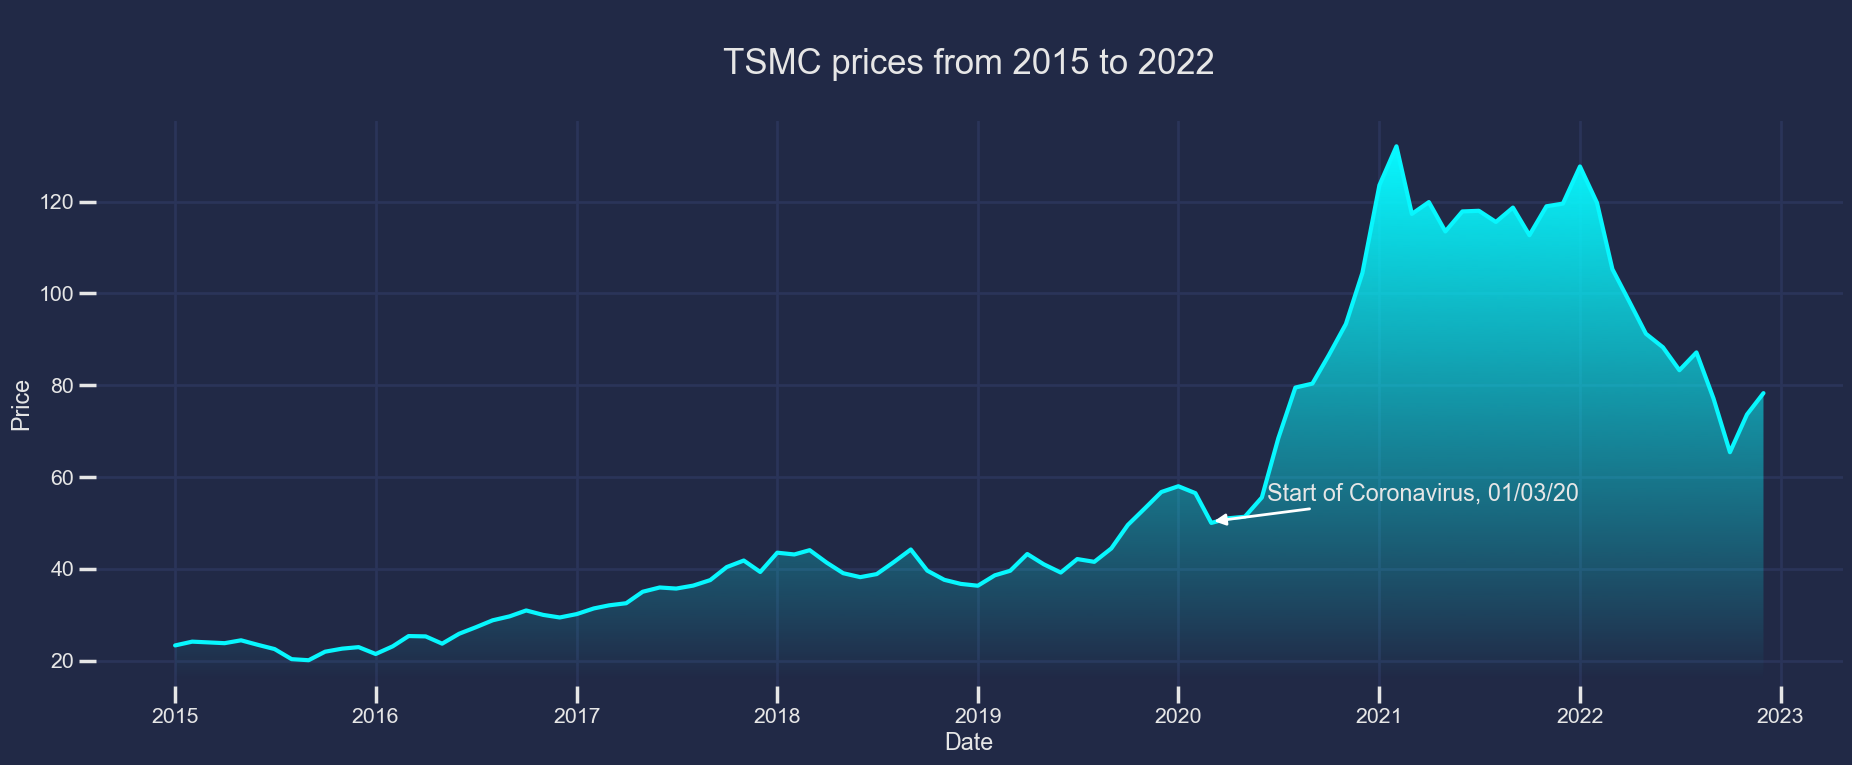

In [8]:
# Plotting a graphic about tsmc prices from 2015 to 2022

fig, ax = plt.subplots(figsize=(20, 8))
plt.tight_layout(pad=4.0)

x=tsmc_medium_price["Date"]
y=tsmc_medium_price["Price"]
a = [datetime(2020, 3, 1)]
b = [50.30]
ax.annotate('Start of Coronavirus, 01/03/20', (mdates.date2num(a[0]), b[0]), xytext=(40, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>',color='white'))

sns.lineplot(x=tsmc_medium_price["Date"], y=tsmc_medium_price["Price"])

ax.set_title("\nTSMC prices from 2015 to 2022\n", fontsize=25)

mplcyberpunk.add_gradient_fill(gradient_start='bottom')

sns.despine(left=True, bottom=True)

# to save images with transparent background
# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/TSMC_stock_prices.png', transparent=True)
plt.show()

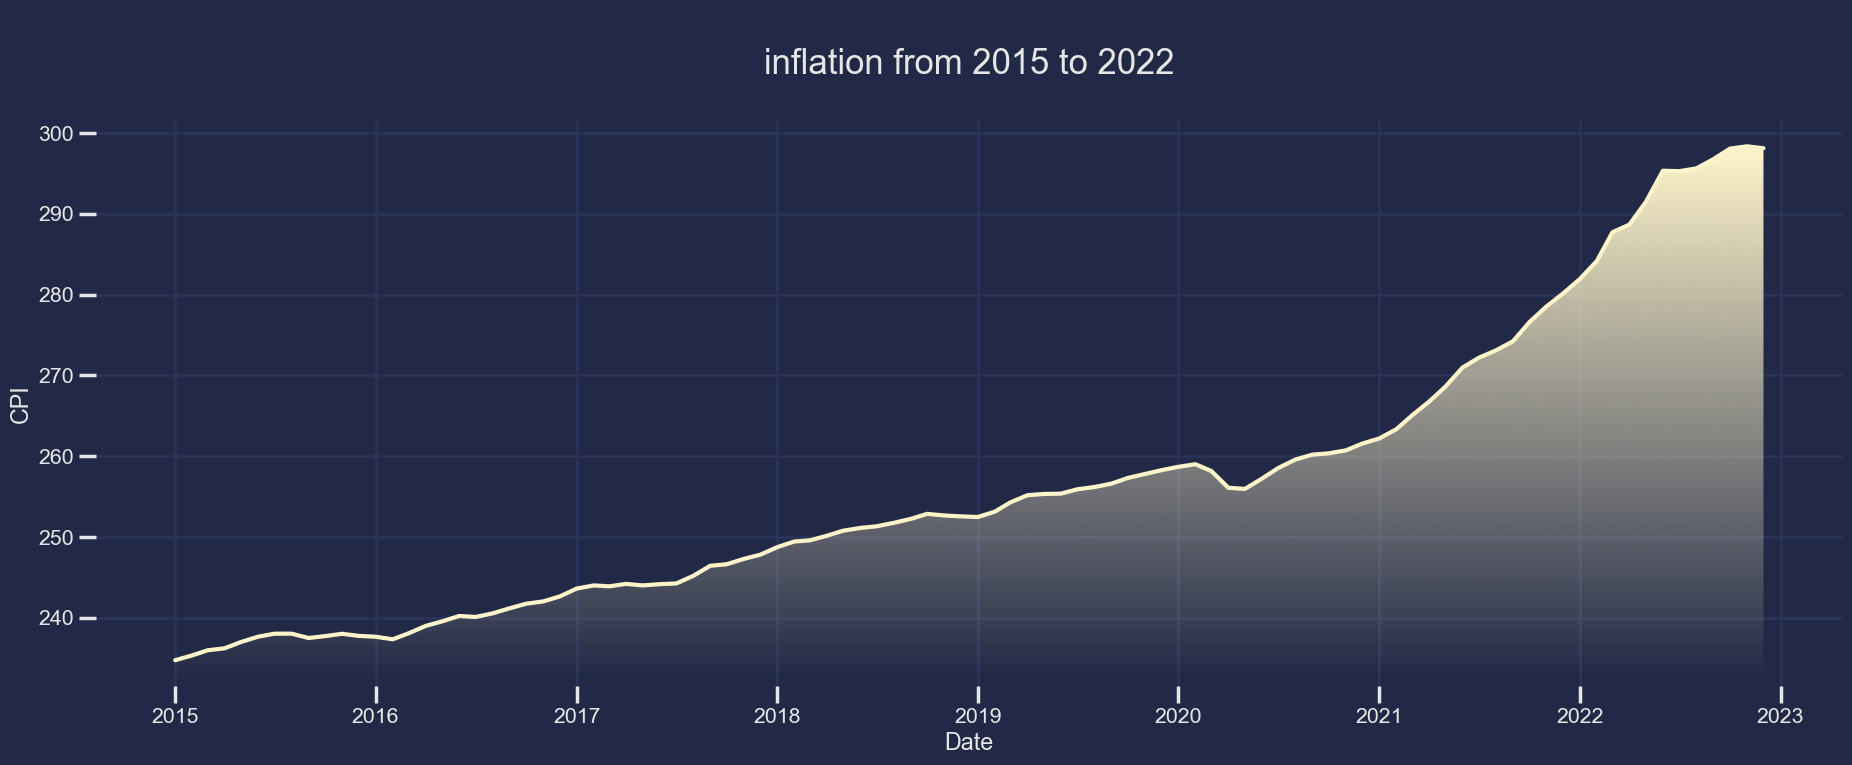

In [9]:
# Plotting a graphic about inflation from 2015 to 2022

fig, ax = plt.subplots(figsize=(20, 8))
plt.tight_layout(pad=4.0)


sns.lineplot(inflation_value, color = '#fef4ca')

ax.set_title("\ninflation from 2015 to 2022\n", fontsize=25)

mplcyberpunk.add_gradient_fill(gradient_start='bottom')

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/inflation.png', transparent=True)
plt.show()

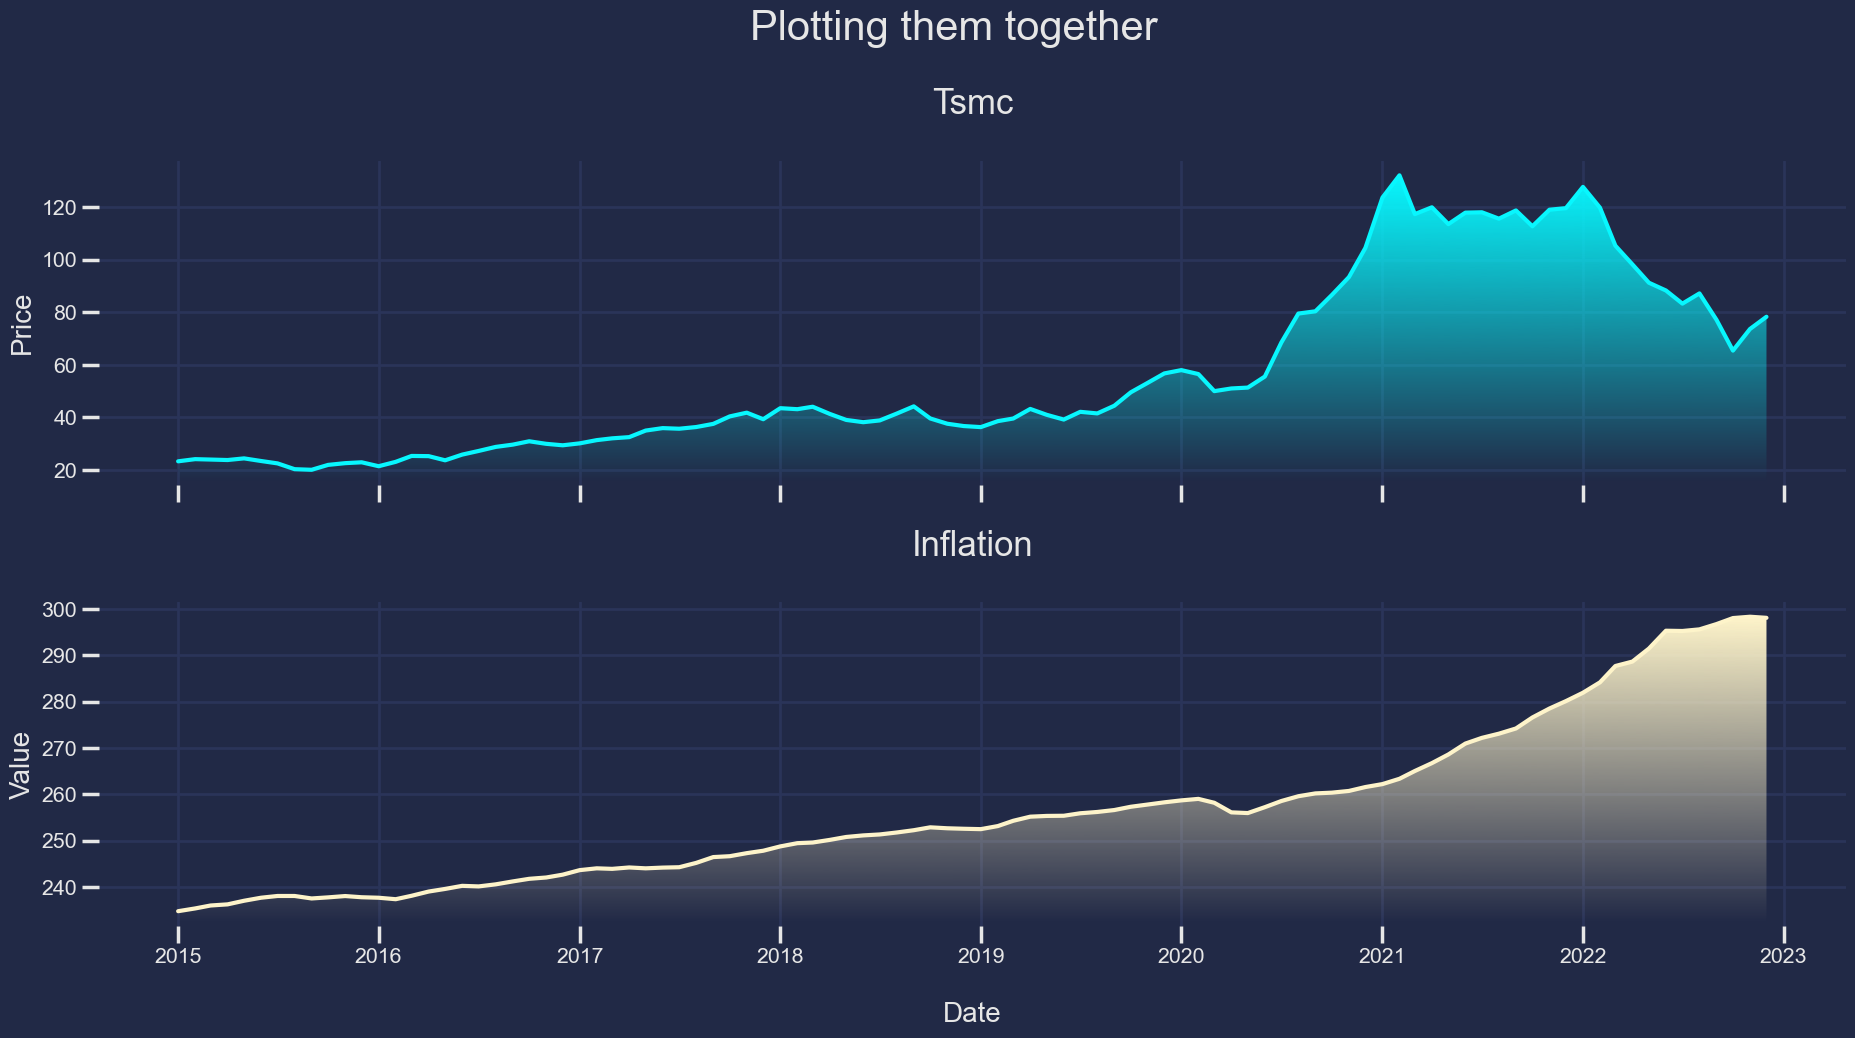

In [10]:
# Plotting them together

fig, ax = plt.subplots(2,1,figsize=(20, 10),sharex=True)
plt.tight_layout(pad=4.0)

sns.lineplot(x="Date",y="Price",data=tsmc_medium_price,ax=ax[0])
ax[0].set_title("Tsmc\n",fontsize=25)
ax[0].set_xlabel("Date",fontsize=20)
ax[0].set_ylabel("Price",fontsize=20)

sns.lineplot(inflation_value,ax=ax[1], color = '#fef4ca')
ax[1].set_title("Inflation\n",fontsize=25)
ax[1].set_xlabel("\nDate",fontsize=20)
ax[1].set_ylabel("Value",fontsize=20)

plt.suptitle("Plotting them together",fontsize=30, y=1.05)

mplcyberpunk.add_gradient_fill(ax[0], gradient_start='bottom')
mplcyberpunk.add_gradient_fill(ax[1], gradient_start='bottom')

sns.despine(left=True, bottom=True)

# ax[0].grid(color='white', linewidth =0.2)
# ax[1].grid(color='white', linewidth =0.2)
# plt.savefig('Plots/togheter.png', transparent=True)
plt.show()

## Considerations

Because of the pandemic, TSMC had to endure a sharp increase in the cost of raw materials.
It also needs to finance huge investment plan, in order to expand production to face current shortages.
So, the increase of demand and the shortage of supply during pandemic increased TSMC stock prices and also the price of the microchip.
This situation is one of the main cause of growing inflation in US, because chips have become a really important part for many devices (not only in IT sector) and for many industries.

# SECOND PART

Relation between semiconductor shortage and the car market in particular, we will see the effect that that crisis had onthe value of the new and the used cars

In [11]:
# We start by analyzing all the veicle sales in Us from 2015 to 2022
# https://fred.stlouisfed.org/series/TOTALSA

vehicle_sales = pd.read_csv("Data_files/total_vehicle_sales.csv", index_col=0, parse_dates=True)
total_sales = vehicle_sales['Total sales']
print('That is the total num of cars selled every month in the US in Millions of Units')
total_sales

That is the total num of cars selled every month in the US in Millions of Units


Date
2015-01-01    16.912
2015-02-01    16.895
2015-03-01    17.894
2015-04-01    17.689
2015-05-01    17.945
               ...  
2022-07-01    13.810
2022-08-01    13.740
2022-09-01    14.108
2022-10-01    15.613
2022-11-01    14.645
Name: Total sales, Length: 95, dtype: float64

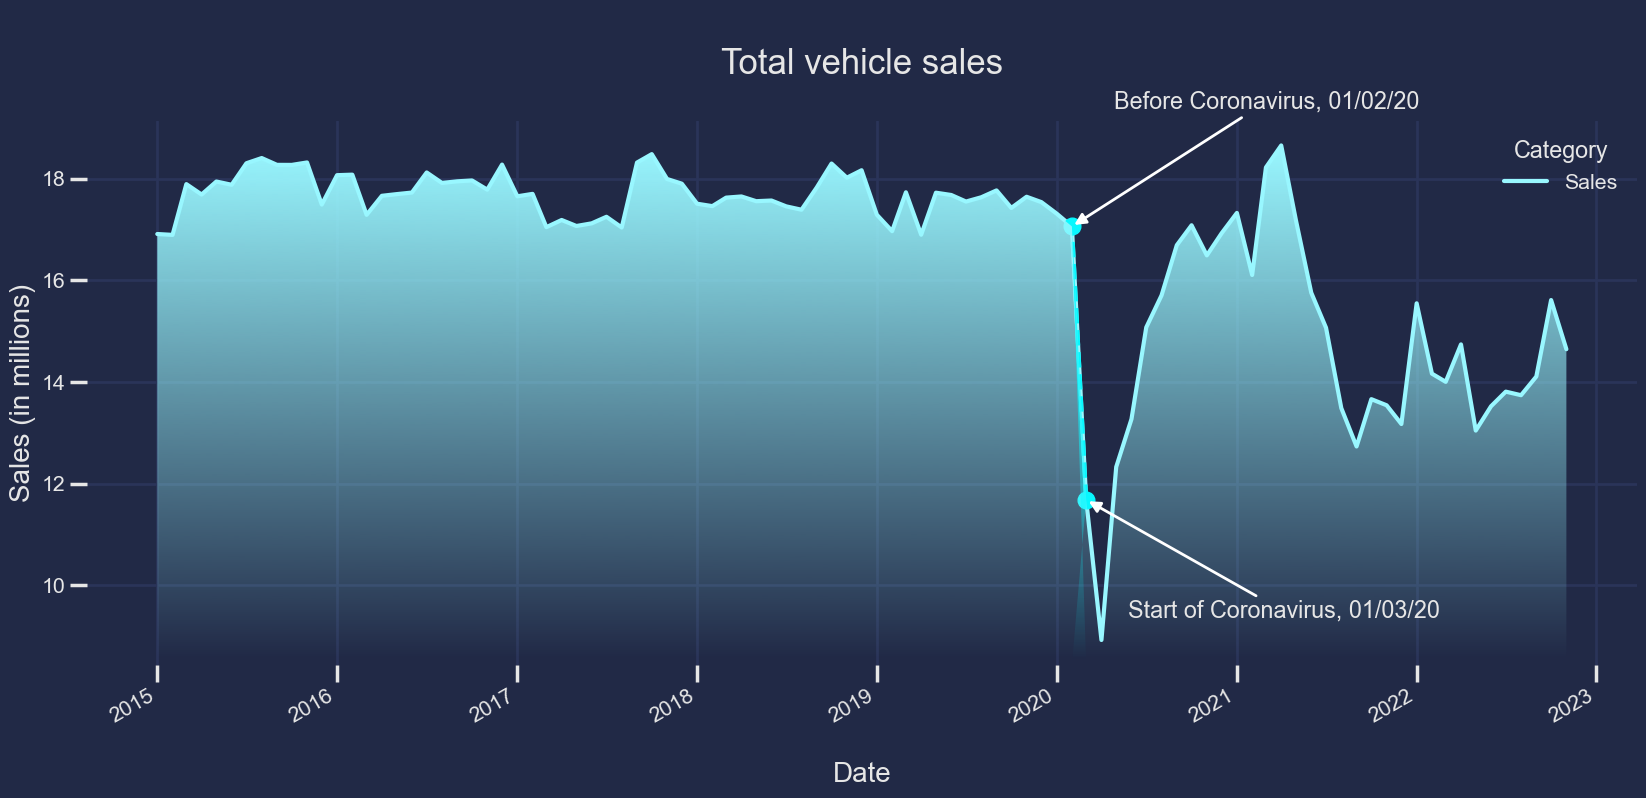

In [12]:
# Plot

fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(total_sales, color = '#99f7ff')

x = [datetime(2020, 3, 1),datetime(2020, 2, 1)]
y = [11.68,17.061]

ax.plot_date(x, y, linestyle='--')

ax.annotate('Start of Coronavirus, 01/03/20', (mdates.date2num(x[0]), y[0]), xytext=(30, -85), 
            textcoords='offset points', arrowprops=dict(color='white',arrowstyle='-|>'))
            
ax.annotate('Before Coronavirus, 01/02/20', (mdates.date2num(x[1]), y[1]), xytext=(30, 85), 
            textcoords='offset points', arrowprops=dict(color='white', arrowstyle='-|>'))

ax.set_title("\nTotal vehicle sales\n", fontsize=25)
ax.set_xlabel("\nDate", fontsize=20)
ax.set_ylabel("Sales (in millions)", fontsize=20)
ax.legend(["Sales"], title="Category", edgecolor="#1c1c1c")
fig.autofmt_xdate()

mplcyberpunk.add_gradient_fill(gradient_start='bottom')

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/vehicles_sales.png', transparent=True)
plt.show()

In [13]:
# Importing a csv about the value of new cars
# https://fred.stlouisfed.org/series/CUUR0000SETA01
value_new_cars = indexes['New Vehicles']


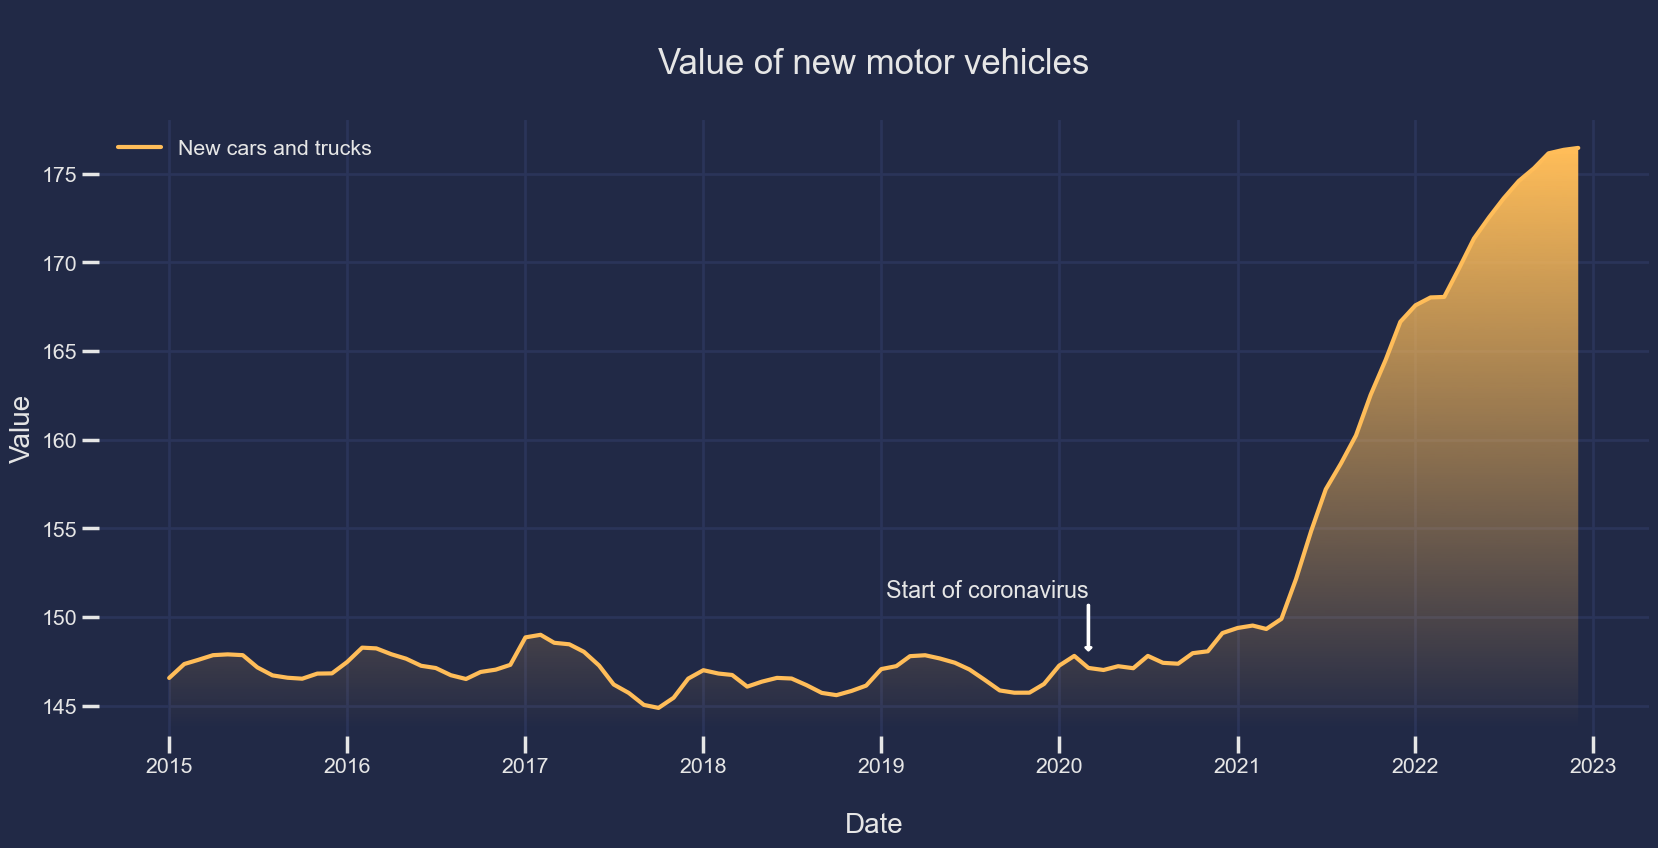

In [14]:
# Plot
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(value_new_cars, color = '#ffbd59')

crisis_data = [
    (datetime(2020, 3, 1), "Start of coronavirus")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, value_new_cars.asof(date) + 1),
                xytext=(date, value_new_cars.asof(date) + 5),
                arrowprops=dict(color="white", headwidth=4, width=.6,
                                headlength=2),
                horizontalalignment="right", verticalalignment="top")

ax.set_title("\nValue of new motor vehicles\n", fontsize=25)
ax.set_xlabel("\nDate", fontsize=20)
ax.set_ylabel("Value", fontsize=20)
ax.legend(["New cars and trucks"])

mplcyberpunk.add_gradient_fill(gradient_start='bottom')

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/value_new_vehicles.png', transparent=True)
plt.show()

In [15]:
# Importing a csv about the value of new cars
# https://fred.stlouisfed.org/series/CUSR0000SETA02

value_used_cars = indexes['Used Vehicles']


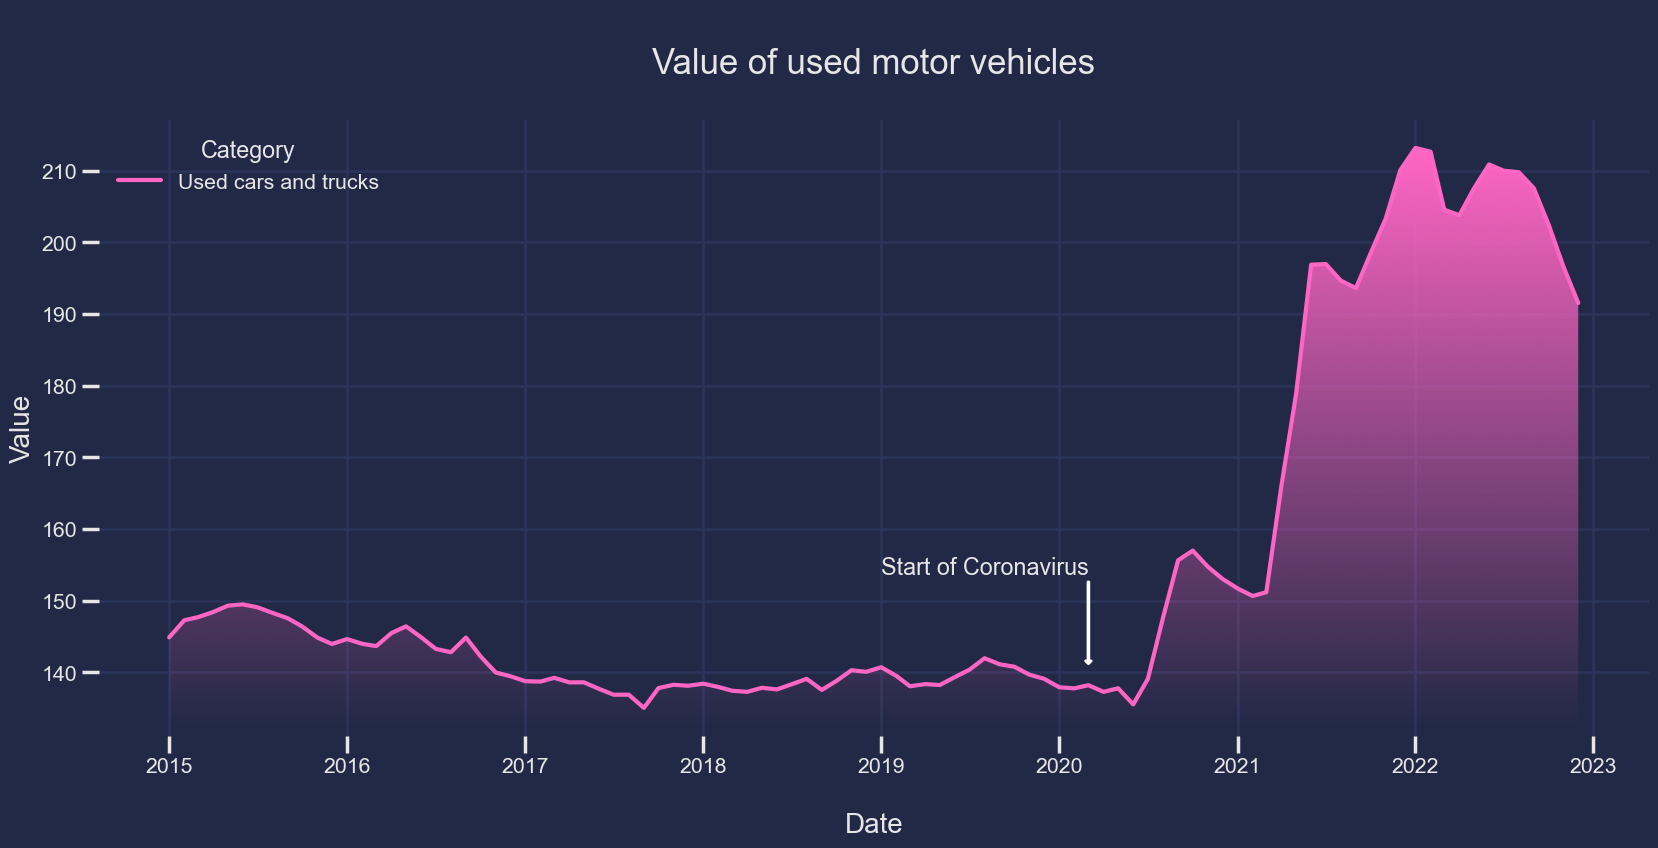

In [16]:
# Plot
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(value_used_cars, color = '#ff66c4')

crisis_data = [
    (datetime(2020, 3, 1), "Start of Coronavirus")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, value_used_cars.asof(date) + 3),
                xytext=(date, value_used_cars.asof(date) + 18),
                arrowprops=dict(color="white", headwidth=4, width=.6,
                                headlength=2),
                horizontalalignment="right", verticalalignment="top")

ax.set_title("\nValue of used motor vehicles\n", fontsize=25)
ax.set_xlabel("\nDate", fontsize=20)
ax.set_ylabel("Value", fontsize=20)
ax.legend(["Used cars and trucks"], title="Category", edgecolor="#1c1c1c")

mplcyberpunk.add_gradient_fill(gradient_start='bottom')

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/value_used_vehicles.png', transparent=True)
plt.show()

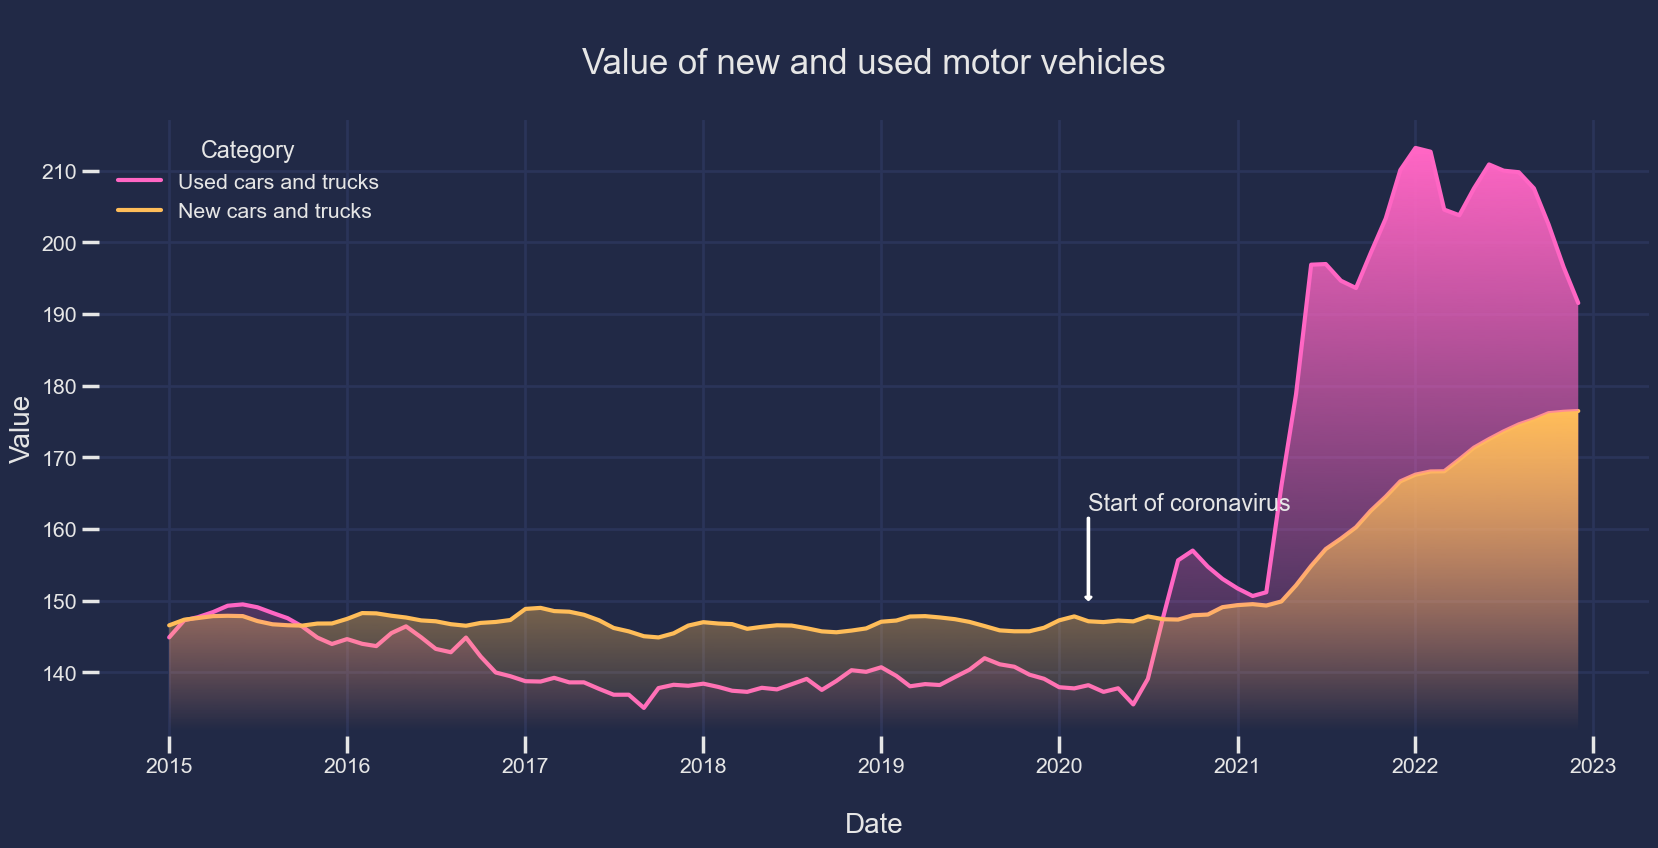

In [17]:
# Comparing the two previous graphics
fig, ax = plt.subplots(figsize=(20, 8))

sns.lineplot(value_used_cars, ax=ax, color = '#ff66c4', label= "Used cars and trucks")
sns.lineplot(value_new_cars, ax=ax, color = '#ffbd59', label= "New cars and trucks")

crisis_data = [
    (datetime(2020, 3, 1), "Start of coronavirus")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, value_new_cars.asof(date) + 3),
                xytext=(date, value_new_cars.asof(date) + 18),
                arrowprops=dict(color="white", headwidth=4, width=.6,
                                headlength=2),
                horizontalalignment="left", verticalalignment="top")

ax.set_title("\nValue of new and used motor vehicles\n", fontsize=25)
ax.set_xlabel("\nDate", fontsize=20)
ax.set_ylabel("Value", fontsize=20)
ax.legend(title="Category", edgecolor="#1c1c1c")

mplcyberpunk.add_gradient_fill(gradient_start='bottom')

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/values_new_used.png', transparent=True)
plt.show()


We can clearly see that, as we expected, during the pandemic there has been a slump in sales the interesting thing, althought, is what happened to the used cars: in fact, because of many factors (chip shortage, pandemic ecc), they started to have a value HIGHER than the value of new cars!

# THIRD PART
Heatmap and Regressions

In [18]:
# HEATMAP
cpi=pd.read_csv("Data_files/heatmap.csv", index_col=0, parse_dates=True)
cpi

,All items,Medical care,Used vehicles,Energy,Food,Less F&E,Shelter,Electricity,Motor fuel
Date,,,,,,,,,
2015-01-01,234.747,441.351,144.875,199.926,246.197,239.811,274.762,210.956,201.099
2015-02-01,235.342,441.101,147.264,203.021,246.495,240.172,275.470,211.775,208.233
2015-03-01,235.976,442.943,147.694,205.757,246.072,240.755,276.258,210.178,215.931
2015-04-01,236.222,445.822,148.404,203.577,246.002,241.346,277.003,210.345,212.784
2015-05-01,237.001,446.743,149.290,208.973,246.239,241.688,277.524,208.447,226.390
2015-06-01,237.657,446.330,149.480,212.015,246.937,242.064,278.284,209.410,231.952
2015-07-01,238.034,446.953,149.078,211.623,247.157,242.565,279.329,208.761,232.738
2015-08-01,238.033,446.612,148.295,208.579,247.742,242.817,279.921,208.619,226.625
2015-09-01,237.498,447.648,147.554,197.246,248.492,243.316,280.737,208.449,202.855


In [19]:
items_2017_2018 = cpi['2017-01-01':'2018-01-01'].copy()
items_2017_2018

,All items,Medical care,Used vehicles,Energy,Food,Less F&E,Shelter,Electricity,Motor fuel
Date,,,,,,,,,
2017-01-01,243.618,471.484,138.761,205.369,248.065,250.467,293.769,208.295,218.699
2017-02-01,244.006,473.139,138.713,204.133,248.735,250.998,294.543,209.049,214.598
2017-03-01,243.892,473.685,139.232,202.528,249.244,250.944,295.012,208.767,211.556
2017-04-01,244.193,473.007,138.596,202.954,249.589,251.227,295.741,210.370,210.132
2017-05-01,244.004,472.981,138.601,198.449,249.972,251.430,296.461,211.342,198.832
2017-06-01,244.163,474.492,137.691,197.808,249.770,251.746,297.215,212.198,196.777
2017-07-01,244.243,476.279,136.872,195.994,250.185,251.985,297.676,212.955,192.711
2017-08-01,245.183,477.199,136.875,201.450,250.469,252.535,298.904,212.935,204.559
2017-09-01,246.435,477.190,135.033,212.723,250.826,252.812,299.711,213.083,229.145


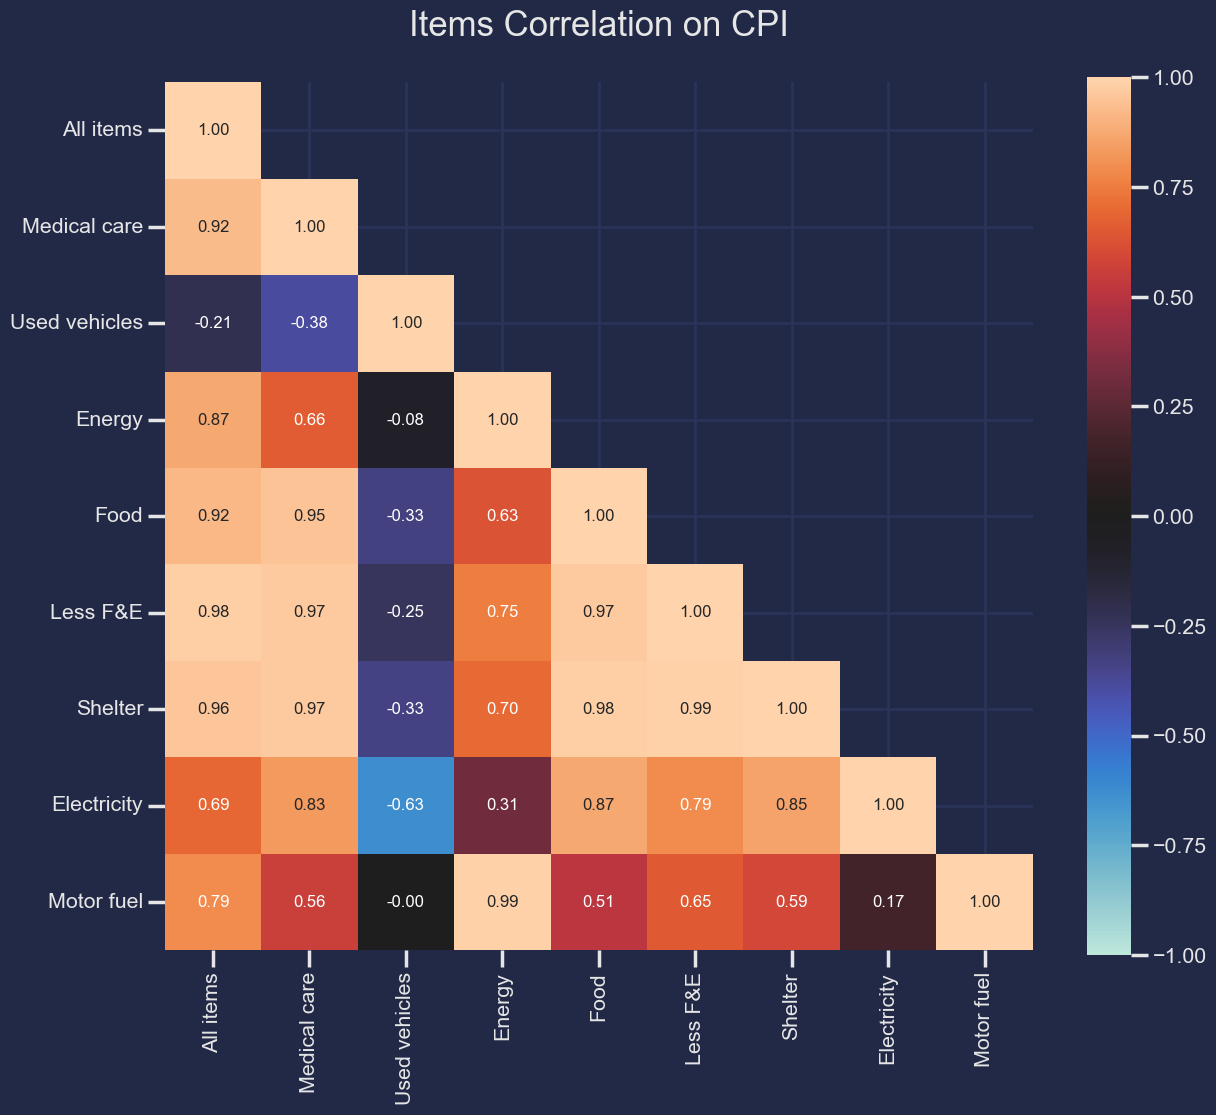

In [20]:
# Computing the correlation matrix
corr = items_2017_2018.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

# Set up the matplotlib figure
plt.subplots(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', center=0, square=True,
            cbar_kws=dict(shrink=.95), vmin=-1, vmax=1, annot_kws=dict(fontsize=12))

# Set title
plt.title("Items Correlation on CPI\n", fontsize=25)
plt.xticks(rotation=90)

# plt.savefig('Plots/heatmap.png', transparent=True)
plt.show()

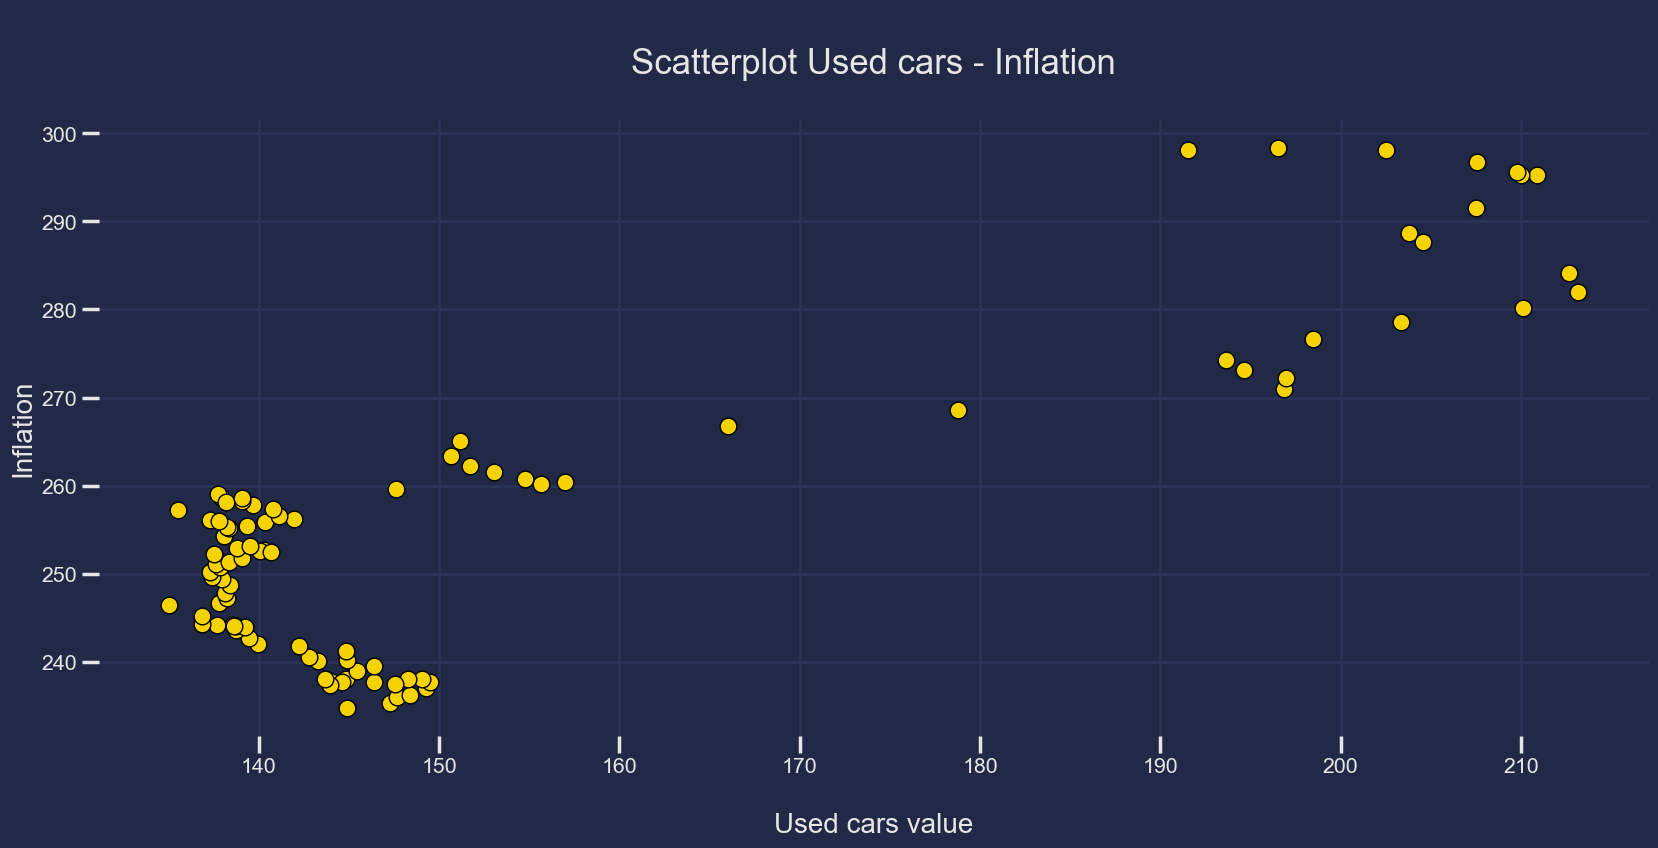

In [21]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.scatterplot(x=indexes["Used Vehicles"],
                y=indexes["CPI"],
                sizes=60, alpha=1,
                edgecolor="black",
                linewidth=1,
                color='#F5D300')

ax.set_title("\nScatterplot Used cars - Inflation\n", fontsize=25)
ax.set_ylabel("Inflation", fontsize=20)
ax.set_xlabel("\nUsed cars value", fontsize=20)

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth=0.2)
# plt.savefig('Plots/scatterplot.png', transparent=True)
plt.show()


In this example, we are interested in findinding out how the relation between used vehicles index and CPI changed during the pandemic.

First, we assume that the used car market and its index is independent of the performance of all other baskets within the CPI; logically, the price of a used car is given by the meeting point between supply and demand, without being affected by external factors.

Building a regression model for the data at our disposal, the variables are as follows:

$$
Y = \text{Average value of CPI}\\
X = \text{Index of used vehicles}\\
Timing \hspace{0.2cm}\text{(before Covid, after Covid)}$$

In [22]:
indexes['Post Covid yes'] = np.where((indexes.index >= '2015-01-01') & (indexes.index <= '2020-03-01'), 0, 1)
indexes

,CPI,New Vehicles,Used Vehicles,Post Covid yes
Date,,,,
2015-01-01,234.747,146.558,144.875,0
2015-02-01,235.342,147.345,147.264,0
2015-03-01,235.976,147.574,147.694,0
2015-04-01,236.222,147.844,148.404,0
2015-05-01,237.001,147.889,149.290,0
...,...,...,...,...
2022-08-01,295.620,174.598,209.782,1
2022-09-01,296.761,175.312,207.532,1
2022-10-01,298.062,176.157,202.510,1


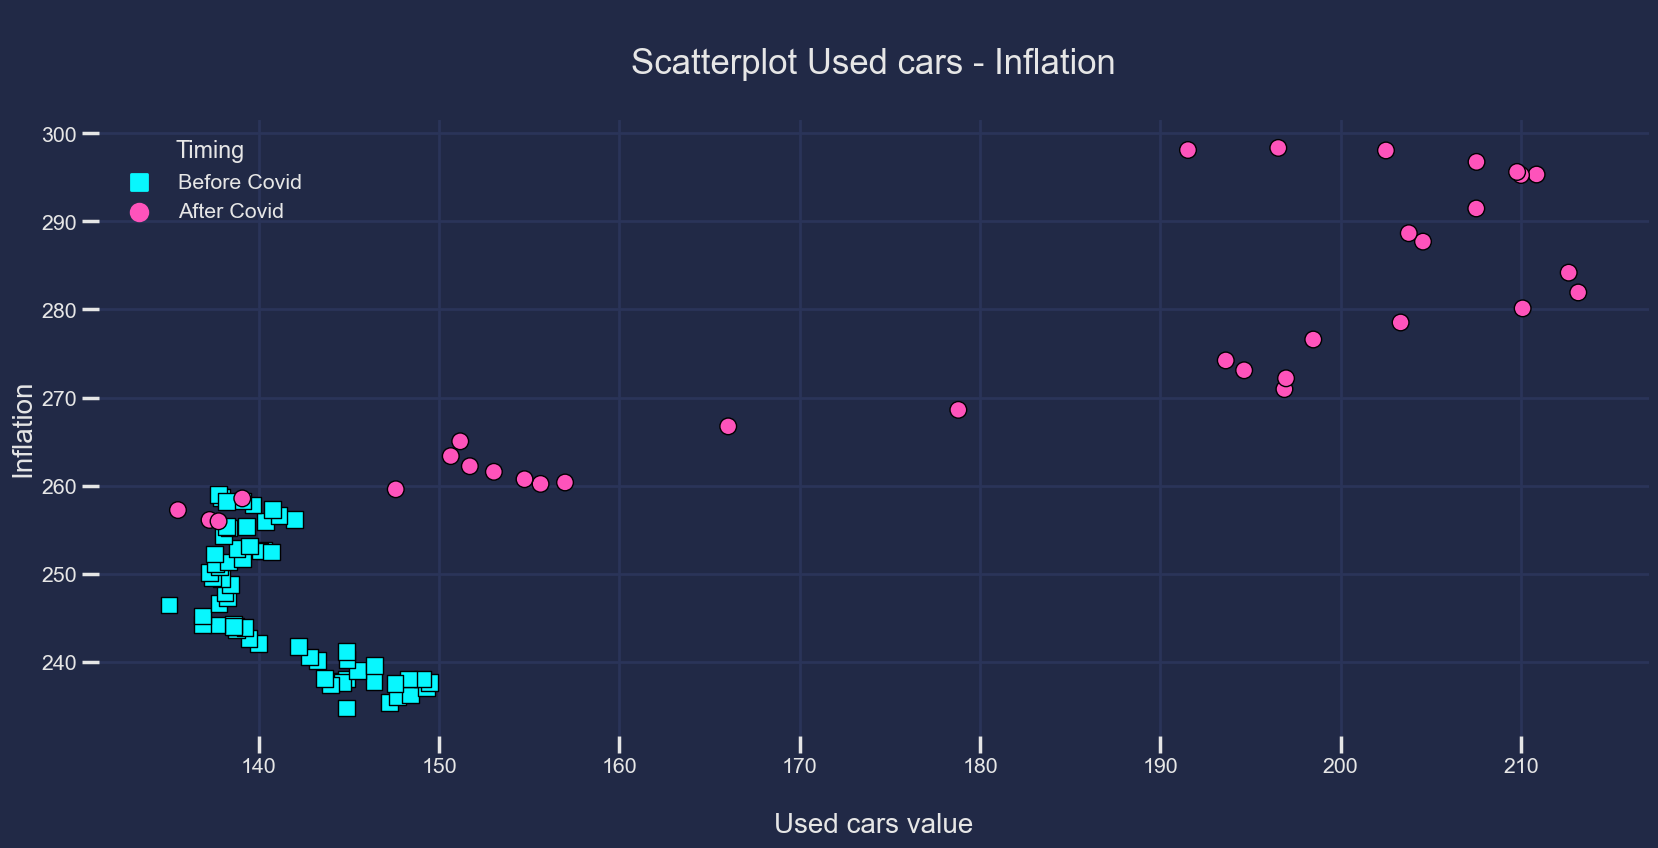

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.scatterplot(x=indexes["Used Vehicles"],
                y=indexes["CPI"],
                hue=indexes["Post Covid yes"],
                style=indexes["Post Covid yes"],
                sizes=60, alpha=1,
                edgecolor="black",
                linewidth=1,
                markers=['s', 'o'])

ax.set_title("\nScatterplot Used cars - Inflation\n", fontsize=25)
ax.set_ylabel("Inflation", fontsize=20)
ax.set_xlabel("\nUsed cars value", fontsize=20)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Before Covid', 'After Covid'], title="Timing")

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/dummy.png', transparent=True)
plt.show()


Fitting the linear regression for each group, the model equations are the following:

**After Covid**
$$y = \beta_{0_A} + \beta_{1_A}X + \epsilon $$

**Before Covid**
$$y = \beta_{0_B} + \beta_{1_B}X + \epsilon$$

### Defining new variables
$$
\begin{aligned}
 X_1 &= X \hspace{0.4cm}\text{(Index of used vehicles)} \\
 X_2 &= \begin{cases} 0 \hspace{0.4cm}\text{if before Covid} \\ 1 \hspace{0.4cm}\text{if after Covid} \end{cases} \\
 X_3 &= X_1 \times X_2 \\
y &= \beta_{0} + \beta_{1}X_1 + \beta_{2}X_2 + \beta_{3}X_3 + \epsilon
\end{aligned}
$$

## Before *
$$
\begin{aligned}
 y &= \beta_{0} + \beta_{1}X_1 + \beta_{2}(0) + \beta_{3}(0) + \epsilon \\
 &= \beta_{0} + \beta_{1}X_1 + \epsilon
\end{aligned}
$$

## After *
$$
\begin{aligned}
 y &= \beta_{0} + \beta_{1}X_1 + \beta_{2}(1) + \beta_{3}X_1(1) + \epsilon \\
 &= \beta_{0} + \beta_{2} + (\beta_{1} + \beta_{3})X_1 + \epsilon
\end{aligned}
$$

Rearranging the factors in the equations and comparing them to each other, we can see that the intercept for the model (After) is $(\beta_{0} + \beta_{2})$, while his slope is $(\beta_{1} + \beta_{3})$. Accordingly, $\beta_{2}$ is the difference in the intercepts and $\beta_{3}$ is the difference in the slopes.

If the lines are the same, $\beta_{2}$ and $\beta_{3}$ should be 0.

In [24]:
indexes["Interaction u x t"] = indexes["Used Vehicles"] * indexes["Post Covid yes"]

indexes

,CPI,New Vehicles,Used Vehicles,Post Covid yes,Interaction u x t
Date,,,,,
2015-01-01,234.747,146.558,144.875,0,0.000
2015-02-01,235.342,147.345,147.264,0,0.000
2015-03-01,235.976,147.574,147.694,0,0.000
2015-04-01,236.222,147.844,148.404,0,0.000
2015-05-01,237.001,147.889,149.290,0,0.000
...,...,...,...,...,...
2022-08-01,295.620,174.598,209.782,1,209.782
2022-09-01,296.761,175.312,207.532,1,207.532
2022-10-01,298.062,176.157,202.510,1,202.510


In [25]:
X = indexes[["Used Vehicles", "Post Covid yes", "Interaction u x t"]]
X = sm.add_constant(X)

y = indexes["CPI"]

In [26]:
model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     228.2
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.75e-42
Time:                        23:22:55   Log-Likelihood:                -307.73
No. Observations:                  96   AIC:                             623.5
Df Residuals:                      92   BIC:                             633.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               440.7795     28.46

In [27]:
data = pd.DataFrame(X, columns=["const", "Used Vehicles", "Post Covid yes", "Interaction u x t"])

data["y"] = y

data_2 = data.rename(columns = {"const": "const", 
"Used Vehicles": "x1",
"Post Covid yes": "x2",
"Interaction u x t": "x3"})

In [28]:
results = smf.ols("y ~ x1 + x2 + x3", data = data_2).fit()
anova_table = sm.stats.anova_lm(results)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,20851.848388,20851.848388,560.859876,6.362316e-41
x2,1.0,1616.689079,1616.689079,43.484684,2.652440e-09
x3,1.0,2989.022675,2989.022675,80.396848,3.414004e-14
Residual,92.0,3420.408791,37.178356,NaN,NaN


Is the relationship between used vehicles index and CPI value the same for both times?


$$
\begin{aligned}
\hat{\beta_{0}} &= 440.78 \\
\hat{\beta_{1}} &= -1.38 \\
\hat{\beta_{2}} &= -249.16 \\
\hat{\beta_{3}} &= 1.84
\end{aligned}
$$
  

|Hypothesis                                                  |Interpretation                           |p-Value                |
|:---                                                        |:---                                     |:---                   |
| $$H_{0}:\beta_{3} = 0 \mid \beta_{0} \beta_{1} \beta_{2}$$ | Same slopes with varying intercepts     |$$3.41e^{-14}$$        | 
| $$H_{0}:\beta_{2} = 0 \mid \beta_{0} \beta_{1} \beta_{3}$$ | Same intercepts with varying slopes     |$$3.36e^{-13}$$        | 
| $$H_{0}:\beta_{2} = 0 \mid \beta_{0} \beta_{1}$$           | Same intercepts with not varying slopes |$$2.652e^{-09}$$       | 


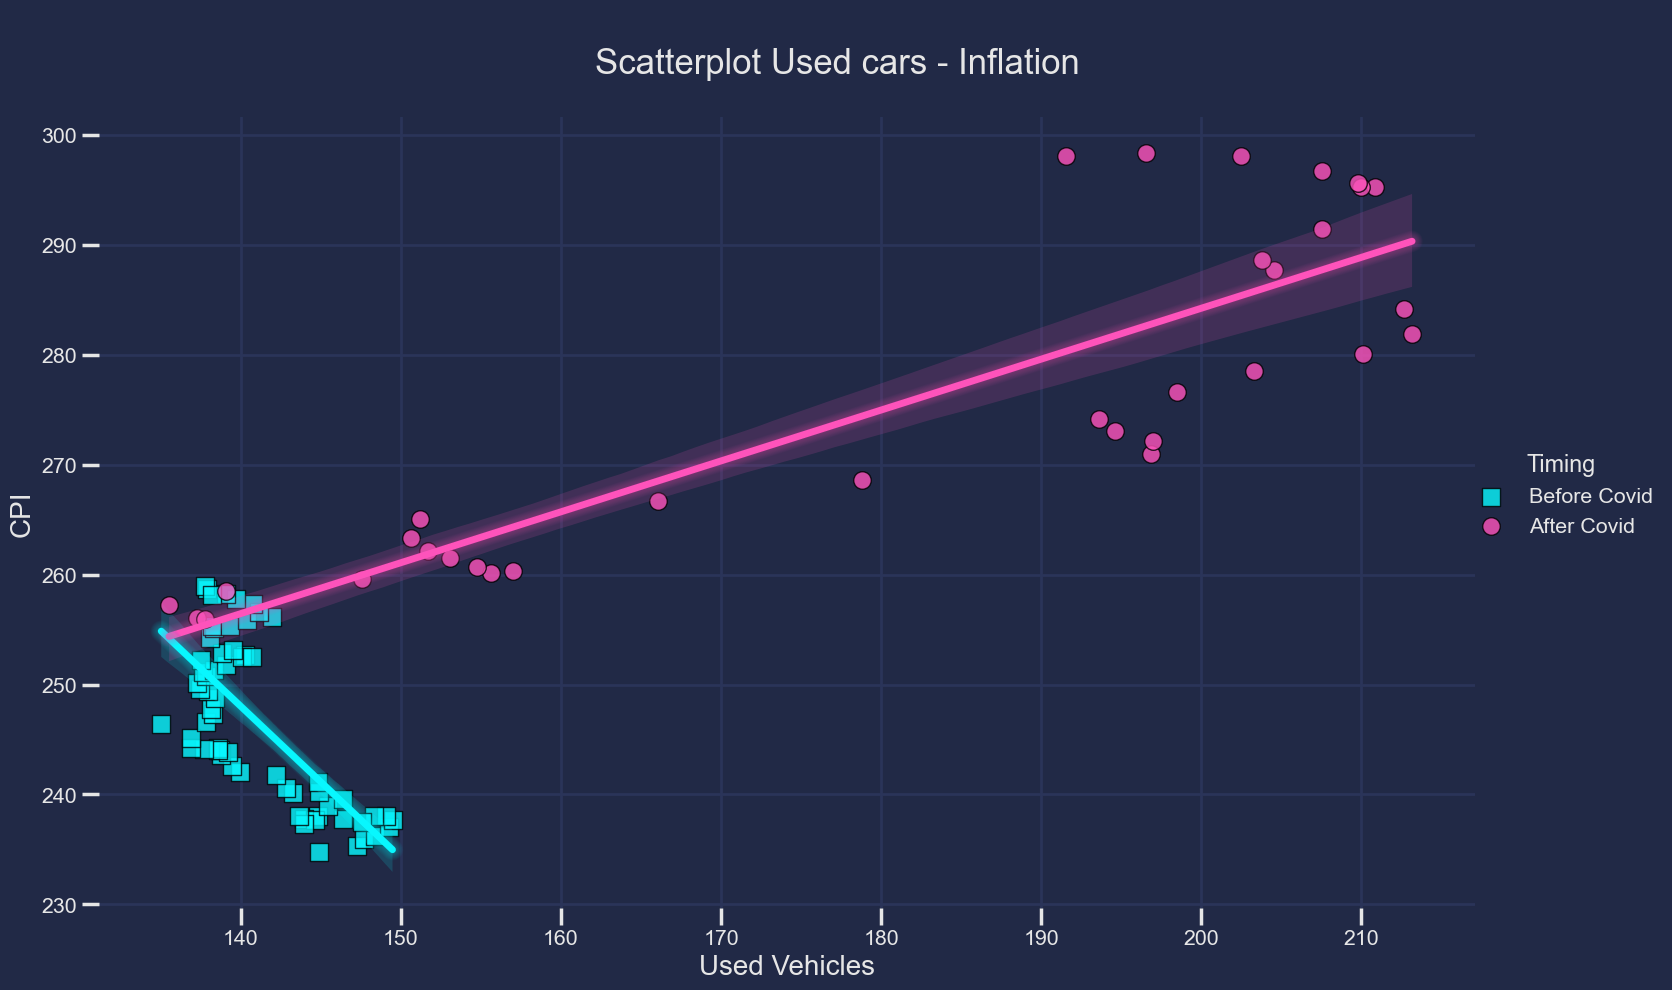

In [29]:
g = sns.lmplot(x="Used Vehicles", y="CPI",
               hue="Post Covid yes",
               data=indexes,
               scatter_kws={'s': 160,
                            'edgecolor': 'black'},
               line_kws={
                   'lw': 5,
                   # 'ls': '--'
               },
               height=(10), aspect=1.5,
               markers=['s', 'o'])

g.fig.suptitle("\nScatterplot Used cars - Inflation\n", fontsize=25)
g.set_axis_labels(x_var="Used Vehicles", y_var="CPI", fontsize=20)

# title
g._legend.set_title("Timing")

# replace labels
new_labels = ['Before Covid', 'After Covid']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.tight_layout(pad=.4)

mplcyberpunk.make_lines_glow()

sns.despine(left=True, bottom=True)

# plt.savefig('Plots/regressions.png', transparent=True)
plt.show()



In [30]:
indexes = pd.read_csv("Data_files/indexes.csv", index_col=0, parse_dates=True)

indexes_from_2021 = indexes['2021-12-01':].copy()
indexes_from_2021

,CPI,New Vehicles,Used Vehicles
Date,,,
2021-12-01,280.126,166.653,210.090
2022-01-01,281.933,167.582,213.173
2022-02-01,284.182,168.027,212.644
2022-03-01,287.708,168.056,204.562
2022-04-01,288.663,169.699,203.776
2022-05-01,291.474,171.350,207.518
2022-06-01,295.328,172.546,210.863
2022-07-01,295.271,173.618,209.998
2022-08-01,295.620,174.598,209.782


In [31]:
index_CPI=indexes_from_2021["CPI"]
index_new_vehicles=indexes_from_2021["New Vehicles"]
index_used_vehicles=indexes_from_2021["Used Vehicles"]

Modus operandi (following the method in: https://www.bls.gov/cpi/tables/relative-importance/home.htm)

To estimate a relative importance for a component for a month other than December, one can use its previous published relative importance and update it by published price changes. For example, suppose you want to estimate the relative importance of energy for the CPI-U in September 2017.

You need the published relative importance for energy for December 2016 and the December 2016 and Sept.ember 2017 indexes for energy and for all items. Enter the weights and indexes for these two item categories (see table A). The updated weight column is the December published weight times the relative change between December 2016 and September 2017. In this example, the updated weight for energy is 7.039 * (215.711/193.306) = 7.8549. For all items, the updated weight is 100.000 * (246.819/241.432) = 102.2313. To calculate the updated relative importance for energy where the weight for all items is normalized to 100, divide the updated weight for energy by the updated weight for all items, times 100. In this example, the estimated relative importance for energy in September 2017 is (7.8549 / 102.2313) X 100 = 7.683.

In [32]:
# First we do new cars
relimp_new = [4.105]  # Taken from source: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.bls.gov%2Fcpi%2Ftables%2Frelative-importance%2F2021.xlsx&wdOrigin=BROWSELINK
for i in range(1, len(indexes_from_2021["New Vehicles"])):
    updated_weight_new = relimp_new[i - 1] * (index_new_vehicles[i]/index_new_vehicles[i-1])
    updated_weight_CPI = 100 * (index_CPI[i]/index_CPI[i-1])
    new_relative_importance_newcars = 100 * (updated_weight_new/updated_weight_CPI)
    relimp_new.append(new_relative_importance_newcars)

relimp_new

[4.105,
 4.101426205068192,
 4.079772557942146,
 4.0304684856434285,
 4.056407786032713,
 4.056371597346959,
 4.031379814007384,
 4.057209180306276,
 4.075293551451777,
 4.0762260845554,
 4.07799547590984,
 4.0786287239783485,
 4.0843941495527005]

In [33]:
# Now we do used cars
relimp_used = [4.143]  # Taken from source: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.bls.gov%2Fcpi%2Ftables%2Frelative-importance%2F2021.xlsx&wdOrigin=BROWSELINK
for i in range(1, len(indexes_from_2021["Used Vehicles"])):
    updated_weight_used = relimp_used[i - 1] * (index_used_vehicles[i]/index_used_vehicles[i-1])
    updated_weight_CPI = 100 * (index_CPI[i]/index_CPI[i-1])
    new_relative_importance_usedcars = 100 * (updated_weight_used/updated_weight_CPI)
    relimp_used.append(new_relative_importance_usedcars)

relimp_used

[4.143,
 4.176853631120793,
 4.133515198679429,
 3.927679077130497,
 3.899643303516472,
 3.9329545197139657,
 3.9441981846012433,
 3.9287766123814842,
 3.9201021228510187,
 3.863146853311584,
 3.7532097386749887,
 3.6390424993411314,
 3.5491541105493365]

In [34]:
rounded_imp_new = [round(item, 3) for item in relimp_new]
rounded_imp_used = [round(item, 3) for item in relimp_used]
indexes_from_2021['Relative Importance New'] = rounded_imp_new
indexes_from_2021['Relative Importance Used'] = rounded_imp_used
indexes_from_2021

,CPI,New Vehicles,Used Vehicles,Relative Importance New,Relative Importance Used
Date,,,,,
2021-12-01,280.126,166.653,210.090,4.105,4.143
2022-01-01,281.933,167.582,213.173,4.101,4.177
2022-02-01,284.182,168.027,212.644,4.080,4.134
2022-03-01,287.708,168.056,204.562,4.030,3.928
2022-04-01,288.663,169.699,203.776,4.056,3.900
2022-05-01,291.474,171.350,207.518,4.056,3.933
2022-06-01,295.328,172.546,210.863,4.031,3.944
2022-07-01,295.271,173.618,209.998,4.057,3.929
2022-08-01,295.620,174.598,209.782,4.075,3.920


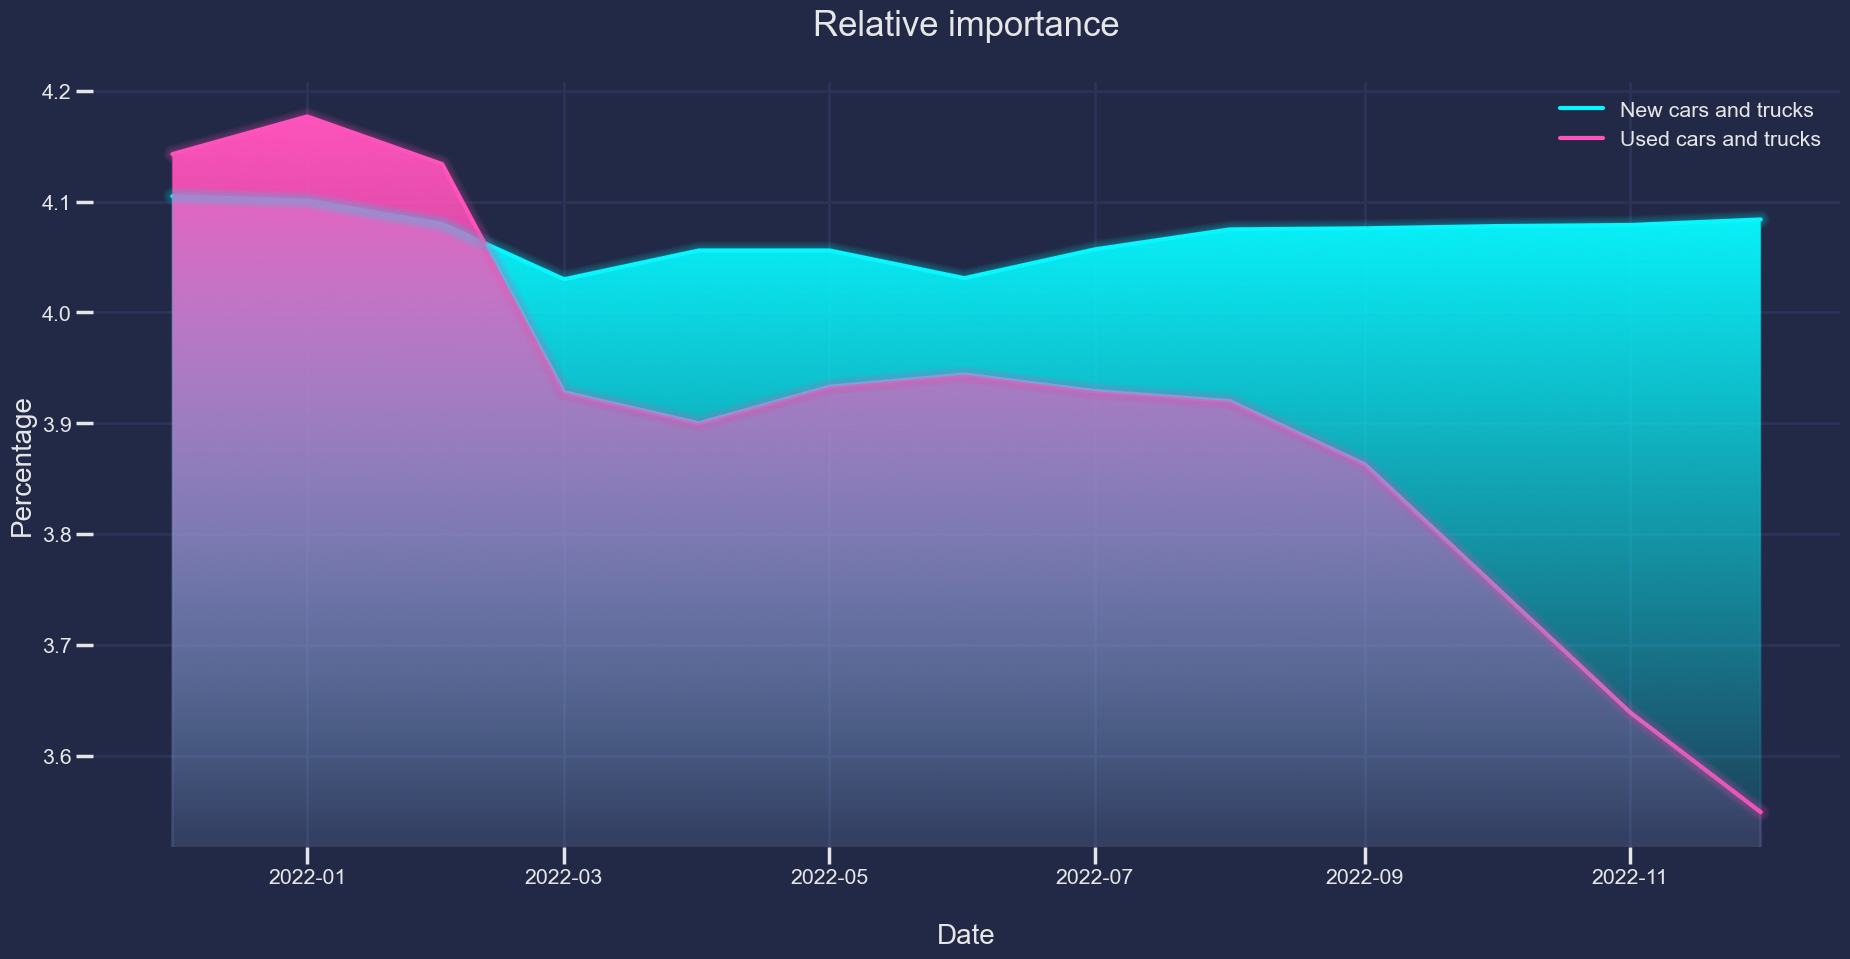

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.tight_layout(pad=4.0)

sns.lineplot(x=indexes_from_2021.index,
             y=indexes_from_2021['Relative Importance New'], label="New cars and trucks")
sns.lineplot(x=indexes_from_2021.index,
             y=indexes_from_2021['Relative Importance Used'], label="Used cars and trucks")

ax.set_title("Relative importance\n", fontsize=25)
ax.set_xlabel("\nDate", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)
ax.legend()

mplcyberpunk.add_gradient_fill(gradient_start='bottom',
                               # alpha_gradientglow=0.5
                               )

mplcyberpunk.add_glow_effects()

sns.despine(left=True, bottom=True)

# ax.grid(color='white', linewidth =0.2)
# plt.savefig('Plots/relative_importance.png', transparent=True)
plt.show()


In [36]:
# All baskets relative importance in December 2022, source: https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.bls.gov%2Fcpi%2Ftables%2Fsupplemental-files%2Fnews-release-table1-202212.xlsx&wdOrigin=BROWSELINK
all_items = pd.read_csv('Data_files/relative_importance_2022.csv')

# Adding the macro category 'All items'
all_items['All items']= 'All items'
all_items

,Item,Subcategory,Category,Relative importance,All items
0,Bakery,Food at home,Food,1.118,All items
1,Meats. poultry. fish. and eggs,Food at home,Food,1.898,All items
2,Dairy,Food at home,Food,0.811,All items
3,Fruits/veggies,Food at home,Food,1.431,All items
4,Beverages,Food at home,Food,0.981,All items
5,Other foods,Food at home,Food,2.285,All items
6,Food away from home,Others,Food,5.257,All items
7,Fuel oil,Commodities,Energy,0.183,All items
8,Motor fuel,Commodities,Energy,4.052,All items
9,Electricity,Services,Energy,2.610,All items


In [37]:
# Plotting
fig = px.sunburst(
    data_frame=all_items,
    path=['All items', 'Category', 'Subcategory', 'Item'],
    values='Relative importance'
)

# Setting the plot dimensions
fig.update_layout(
    width=1024,
    height=1024,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#212946",
)

# Fixing texts and labels
fig.update_traces(texttemplate='%{label}<br>%{percentRoot:.1%}',
                  # textinfo= "label + percent root",
                  insidetextorientation='auto',
                  # marker_line_color='white',
                  marker_line_width=2,
                  textfont_color='white',
                  textfont_size=18
                  )

fig.show()


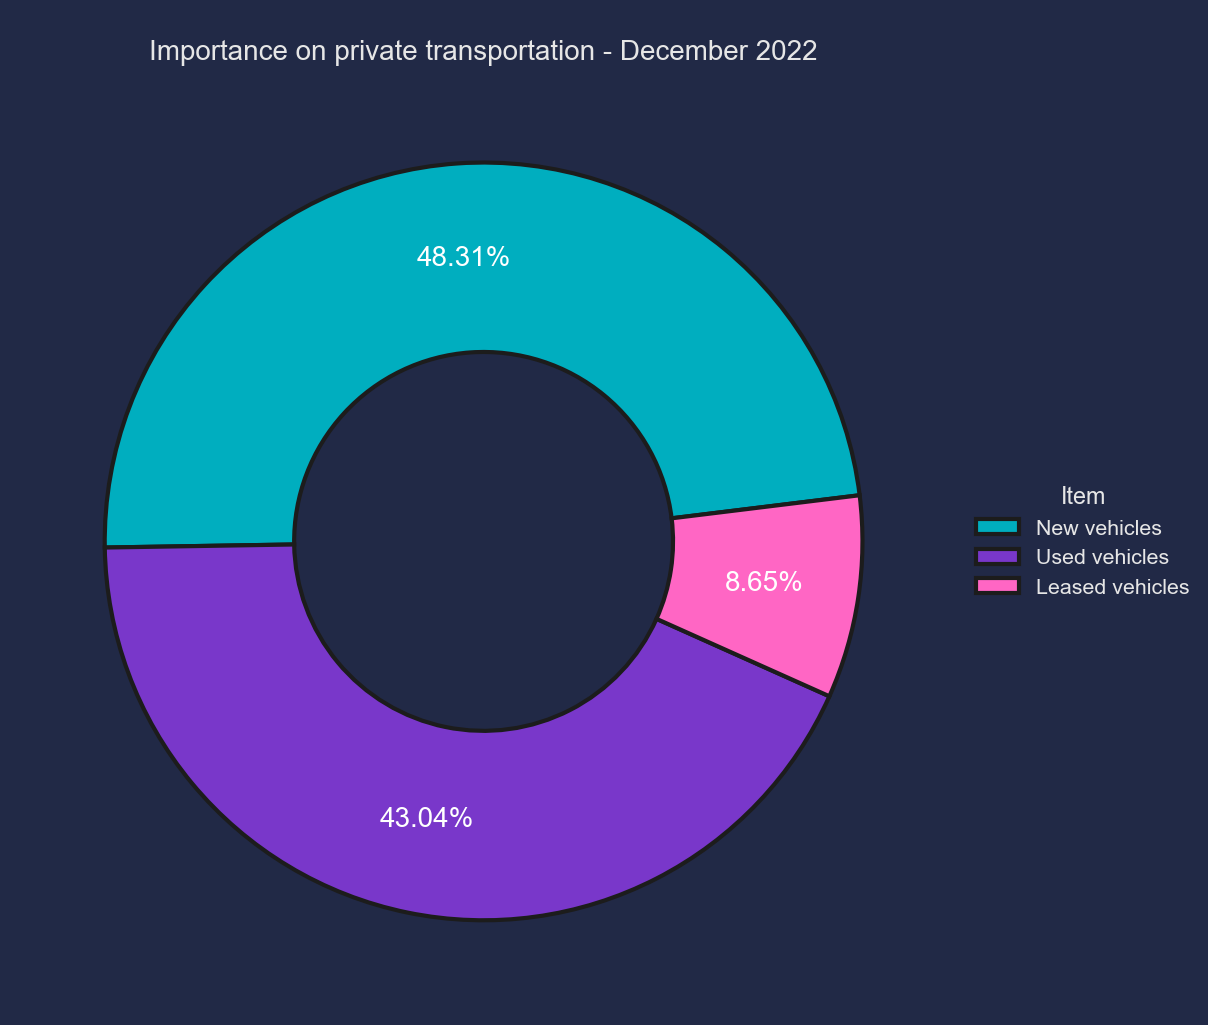

In [38]:
plt.subplots(figsize=(12, 12))
plt.tight_layout(pad=4.0)

labels = ['New vehicles', 'Used vehicles', 'Leased vehicles']
size = 0.5

slices = [all_items['Relative importance'][11],
          all_items['Relative importance'][12],
          all_items['Relative importance'][13]]

wedges, texts, autotexts = plt.pie(slices,
                                   textprops=dict(size=20, color="white"),
                                   autopct="%.2f%%",
                                   pctdistance=0.75,
                                   radius=1,
                                   colors=["#00aebf","#7937ca","#ff66c4"],
                                   # labels = labels, labeldistance = 1.05,
                                   # shadow=True,
                                   wedgeprops=dict(width=size, edgecolor="#1c1c1c", linewidth=3),
                                   startangle=7)

plt.legend(wedges, labels, title="Item", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="#1c1c1c")
plt.title("\nImportance on private transportation - December 2022", fontsize=20)

# ax.grid(color='white', linewidth =0.3)
# plt.savefig('Plots/pie.png', transparent=True)
plt.show()